In [ ]:
import pandas as pd

In [ ]:
# Importing Gaussain process classifier, kernels and Kfold from Scikit learn package
from sklearn.gaussian_process import GaussianProcessClassifier as GPC 

In [ ]:
# Defining Training set (Tr_set) and Test set (Te_set)
Tr_set = pd.read_csv('/content/drive/MyDrive/train_selected.csv')
Te_set = pd.read_csv('/content/drive/MyDrive/test_selected_ttf.csv')

In [ ]:
X_te = Te_set[['s1','s2','s3','s4']]
Y_te = Te_set[['label_bnc']]

In [ ]:
Tr_set.head(10) # Training data 

,id,cycle,s1,s2,s3,s4,ttf,label_bnc
0,1,1,1400.60,554.36,47.47,521.66,191,0
1,1,2,1403.14,553.75,47.49,522.28,190,0
2,1,3,1404.20,554.26,47.27,522.42,189,0
3,1,4,1401.87,554.45,47.13,522.86,188,0
4,1,5,1406.22,554.00,47.28,522.19,187,0
5,1,6,1398.37,554.67,47.16,521.68,186,0
6,1,7,1397.77,554.34,47.36,522.32,185,0
7,1,8,1400.97,553.85,47.24,522.47,184,0
8,1,9,1394.80,553.69,47.29,521.79,183,0
9,1,10,1400.46,553.59,47.03,521.79,182,0


In [ ]:
Te_set.head(10)  # Test Data

,id,cycle,s1,s2,s3,s4,ttf,label_bnc
0,1,31,1398.91,554.42,47.23,521.79,112,0
1,2,49,1410.83,553.52,47.67,521.74,98,0
2,3,126,1418.89,552.59,47.88,520.83,69,0
3,4,106,1406.88,552.64,47.65,521.88,82,0
4,5,98,1419.36,553.29,47.46,521.00,91,0
5,6,105,1404.49,553.73,47.51,521.56,93,0
6,7,160,1413.57,553.42,47.32,522.32,91,0
7,8,166,1413.89,553.51,47.59,520.53,95,0
8,9,55,1410.27,552.58,47.58,521.65,111,0
9,10,192,1398.99,552.88,47.59,521.82,96,0


In [ ]:
X_tr = Tr_set[['id','cycle','s1','s2','s3','s4']]  # X_labels in training data 
Y_tr = Tr_set[['label_bnc']]  # Y_labels in Training data 

X_tr = X_tr.iloc[:11000]
Y_tr = Y_tr.iloc[:11000]

In [ ]:
X_tr.head()

,id,cycle,s1,s2,s3,s4
0,1,1,1400.60,554.36,47.47,521.66
1,1,2,1403.14,553.75,47.49,522.28
2,1,3,1404.20,554.26,47.27,522.42
3,1,4,1401.87,554.45,47.13,522.86
4,1,5,1406.22,554.00,47.28,522.19


In [ ]:
Y_tr.head()

,label_bnc
0,0
1,0
2,0
3,0
4,0


In [ ]:
# kernel = C()*Exp(length_scale=24, periodicity=1.0)

In [ ]:
# Engine Failure Model
EFM = GPC(n_restarts_optimizer=10,max_iter_predict=500,warm_start=True) 

In [ ]:
EFM.fit(X_tr,Y_tr)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianProcessClassifier(max_iter_predict=500, n_restarts_optimizer=10,
                          warm_start=True)

In [ ]:
y_pred = EFM.predict(X_te)  

In [ ]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
from matplotlib import pyplot as plt

In [ ]:
Y_te.head(100)

,label_bnc
0,0
1,0
2,0
3,0
4,0
...,...
95,0
96,0
97,0
98,0


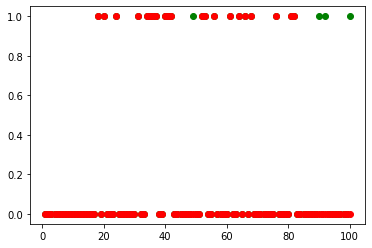

In [ ]:
plt.scatter(X_te['id'], Y_te, color ='g' )
plt.scatter(X_te['id'], y_pred, color = 'r') 

In [ ]:
EFM.score(X_te,Y_te)

0.96

In [ ]:
from sklearn.metrics import confusion_matrix as CF

In [ ]:
 C_F = CF(Y_te,y_pred)

In [ ]:
import seaborn as sn

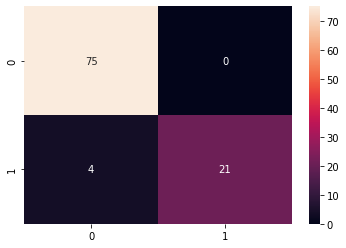

In [ ]:
sn.heatmap(C_F, annot=True)